In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [100]:
def get_data(fname):
    def get_file(fname):
        with open(fname) as f:
            lines = [line.rstrip() for line in f]
        return lines
    data=get_file(fname)
    n=[j for j,i in enumerate(data) if "mode" in i ][0]
    return np.array([i.split() for i in data[n:] if len(i.split())==4],dtype=float).T[1:].T
def get_xz(fname,n=300,eta=2):
    data=get_data(fname)
    x=np.linspace(0,1060,n,dtype=complex)
    z=np.zeros(n,dtype=complex)
    for i in range(len(data.T[0])):
        z+=-data.T[2][i]/(x-data.T[0][i]+eta*1j)
    return x,z

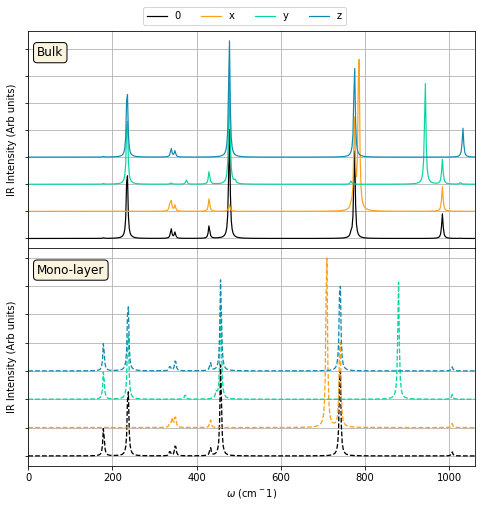

In [180]:
fig,ax1=plt.subplots(2,1,figsize=(8,8))
n=500;eta=2
c=["k","#ff9f1c","#06d6a0","#118ab2","#073b4c"];i=0;a=1

ax=ax1[0];lw=1.2
ax.set_xticklabels("")
fname="bulk/0"
x,z=get_xz(fname,n=n,eta=eta)
ax.plot(x,z.imag,label="0",alpha=a,c=c[i],lw=lw);i+=1

fname="bulk/x"
x,z=get_xz(fname,n=n,eta=eta)
ax.plot(x,z.imag+20,label="x",alpha=a,c=c[i],lw=lw);i+=1

fname="bulk/y"
x,z=get_xz(fname,n=n,eta=eta)
ax.plot(x,z.imag+20*2,label="y",alpha=a,c=c[i],lw=lw);i+=1

fname="bulk/z"
x,z=get_xz(fname,n=n,eta=eta)
ax.plot(x,z.imag+20*3,label="z",alpha=a,c=c[i],lw=lw);i+=1
ax.text(.02, .9, 'Bulk', color='black',fontsize=12,
        horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes,
     bbox=dict(edgecolor='k',facecolor="#faf3dd", boxstyle='round'))

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',ncol=4,bbox_to_anchor=(.5, .93))


i=0;ls="--";lw=1.3;a=1
ax=ax1[1]
fname="mono/0_wo2d"
x,z=get_xz(fname,n=n,eta=eta)
ax.plot(x,z.imag,label="0",alpha=a,c=c[i],lw=lw,ls=ls);i+=1

fname="mono/x_wo2d"
x,z=get_xz(fname,n=n,eta=eta)
ax.plot(x,z.imag+10,label="x",alpha=a,c=c[i],lw=lw,ls=ls);i+=1

fname="mono/y_wo2d"
x,z=get_xz(fname,n=n,eta=eta)
ax.plot(x,z.imag+10*2,label="y",alpha=a,c=c[i],lw=lw,ls=ls);i+=1

fname="mono/z_wo2d"
x,z=get_xz(fname,n=n,eta=eta)
ax.plot(x,z.imag+10*3,label="z",alpha=a,c=c[i],lw=lw,ls=ls);i+=1

plt.subplots_adjust(hspace=.0)
ax.set_xlabel("$\\omega$ (cm$^-1$)")
ax.text(.02, .9, 'Mono-layer', color='black',fontsize=12,
        horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes,
     bbox=dict(edgecolor='k',facecolor="#faf3dd", boxstyle='round'))
for i in ax1:
    i.set_yticklabels("")
    i.set_ylabel("IR Intensity (Arb units)")
    i.grid()
    i.set_xlim(0,1060)
plt.savefig("IR.png",dpi=300)
plt.show()